this[https://www.izhikevich.org/publications/spikes.htm] is a link to an ODE model for neuronal spiking by Ichikevich.
I stress again that this is an ODE so we wont be fucked over by accidentally doing a PDE thing again.
This is basically an extention of Hodgkin-Huxley.
I've had a stab at implementing it here.

Text(0, 0.5, 'u')

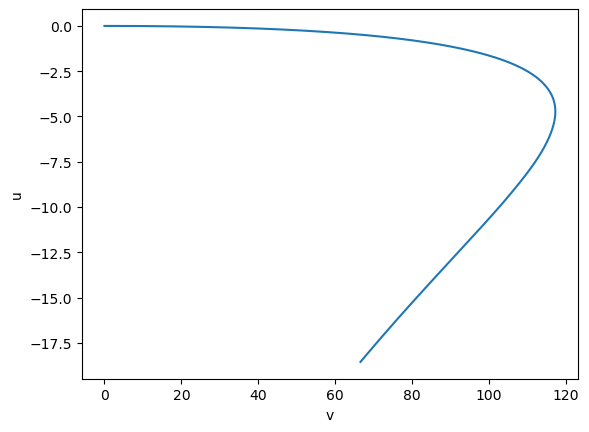

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


a = 0.02
b = 0.2
c = -65
d = 2
I = 0 

def izhikevich(t, y, a, b, c, d, I):
    u, v = y

    if v > 30:
        v = c
        u = u + d

    dvdt = 0.04 * v*v + 5*v + 140 - u + I
    dudt = a*(b*v - u)
    return [dvdt, dudt]

ic = [0,0]
t_span = [0, 10]
t_eval = np.linspace(t_span[0], t_span[1], (t_span[1] - t_span[0])*1000)

params = (a,b,c,d,I)

soln = solve_ivp(izhikevich, t_span, ic, args=params, dense_output=True, t_eval=t_eval)

plt.plot(soln.y[0], soln.y[1])
plt.xlabel("v")
plt.ylabel("u")